In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, f1_score 

In [68]:
df = pd.read_csv(r'03_Cleaned_File(Data Preprocessing).csv')

In [69]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [70]:
X = df.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [71]:
X.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
0,619,0,42,101348.88,0.00,1,1,2,1,0,0
1,608,0,41,112542.58,83807.86,1,1,1,1,0,1
2,502,0,42,113931.57,159660.80,3,0,8,0,0,0
3,699,0,39,93826.63,0.00,2,0,1,0,0,0
4,850,0,43,79084.10,125510.82,1,1,2,1,0,1


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
scaler = StandardScaler()
num_features = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [74]:
y_train.value_counts()

Exited
0    6379
1    1618
Name: count, dtype: int64

In [75]:
over_samp = ADASYN()
X_train, y_train = over_samp.fit_resample(X_train, y_train)

In [76]:
y_train.value_counts()

Exited
1    6566
0    6379
Name: count, dtype: int64

In [79]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [84]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1122  459]
 [ 138  281]]


In [86]:
cm

array([[1122,  459],
       [ 138,  281]], dtype=int64)

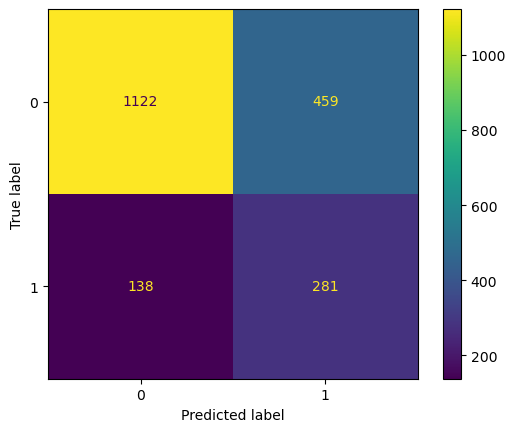

In [89]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [90]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.71
Class 1 Accuracy: 0.67


In [91]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.70
Precision : 0.38
Recall : 0.67
F1 Score : 0.48


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1581
           1       0.38      0.67      0.48       419

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000

